## **Business Case: Delhivery - Feature Engineering**

***About Delhivery***

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities. The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitor

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as spy

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
#shape of the dataset
df.shape

(144867, 24)

In [5]:
# columns names in dataset and their datatype
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [6]:
#Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [7]:
#dropping the unknown columns according to the dataset
unknown_fields = ["is_cutoff", "cutoff_factor", "cutoff_timestamp", "factor", "segment_factor"]
df= df.drop(columns = unknown_fields )


In [8]:
#unique entries present in each column
for i in df.columns:
    print(f"Unique entries for column : {i:<30} = {df[i].nunique()}")

Unique entries for column : data                           = 2
Unique entries for column : trip_creation_time             = 14817
Unique entries for column : route_schedule_uuid            = 1504
Unique entries for column : route_type                     = 2
Unique entries for column : trip_uuid                      = 14817
Unique entries for column : source_center                  = 1508
Unique entries for column : source_name                    = 1498
Unique entries for column : destination_center             = 1481
Unique entries for column : destination_name               = 1468
Unique entries for column : od_start_time                  = 26369
Unique entries for column : od_end_time                    = 26369
Unique entries for column : start_scan_to_end_scan         = 1915
Unique entries for column : actual_distance_to_destination = 144515
Unique entries for column : actual_time                    = 3182
Unique entries for column : osrm_time                      = 1531
Unique ent

In [9]:
#For those columns where number of unique entries is 2, converting the datatype of columns to category
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

In [10]:
floating_columns = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance',
                    'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
for i in floating_columns:
    print(df[i].max())

1927.4477046975032
4532.0
1686.0
2326.1991000000003
3051.0
1611.0
2191.4037000000003


We can update the datatype to float32 since the maximum value entry is small which can help in reducing the size of dataset

In [11]:
for i in floating_columns:
    df[i] = df[i].astype('float32')

#Updating the datatype of the datetime columns
datetime_columns = ['trip_creation_time', 'od_start_time', 'od_end_time']
for i in datetime_columns:
    df[i] = pd.to_datetime(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

Earlier the dataset was using 25.6+ MB of memory but now it has been reduced to 15.2 + MB. Around 40.63 % reduction in the memory usage.

In [12]:
#The time period for which the data is given from the time trip was created till the end of that trip
df['trip_creation_time'].min(), df['od_end_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-08 03:00:24.353479'))

***1) Basic data cleaning and exploration**

***1.1 Handling missing values in the dataset***

In [13]:
# checking for the null values
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

Source name and Destination name columns has 293 and 261 null values respectively.


In [14]:
# getting the unique source_center of those whose source_name is null
missing_source_name = df.loc[df['source_name'].isnull(), 'source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [15]:
# getting the unique destination_center of those whose sdestination_name is null
missing_destination_name = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()
missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [16]:
np.all(df.loc[df['source_name'].isnull(), 'source_center'].isin(missing_destination_name))

False

The centre IDs for which the source name is missing and those all centre IDs for missing destination name are different

***Treating missing destination names and source names***

In [17]:
count = 1
for i in missing_destination_name:
    df.loc[df['destination_center'] == i, 'destination_name'] = df.loc[df['destination_center'] == i, 'destination_name'].replace(np.nan, f'location_{count}')
    count += 1


d = {}
for i in missing_source_name:
    d[i] = df.loc[df['destination_center'] == i, 'destination_name'].unique()
for idx, val in d.items():
    if len(val) == 0:
        d[idx] = [f'location_{count}']
        count += 1
d2 = {}
for idx, val in d.items():
    d2[idx] = val[0]
for i, v in d2.items():
    print(i, v)

IND342902A1B location_1
IND577116AAA location_2
IND282002AAD location_3
IND465333A1B location_4
IND841301AAC location_5
IND509103AAC location_9
IND126116AAA location_8
IND331022A1B location_14
IND505326AAB location_6
IND852118A1B location_7


In [18]:
for i in missing_source_name:
    df.loc[df['source_center'] == i, 'source_name'] = df.loc[df['source_center'] == i, 'source_name'].replace(np.nan, d2[i])

In [19]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

Now the missing values are treated.

***1.2 Analyzing the structure of the data***

In [20]:
#description for numerical data
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,961.262986,234.073380,416.927521,213.868286,284.771301,36.196110,18.507547,22.829018
std,1037.012769,344.990021,598.103638,308.011078,421.119293,53.571156,14.775960,17.860661
min,20.000000,9.000046,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,161.000000,23.355875,51.000000,27.000000,29.914701,20.000000,11.000000,12.070100
50%,449.000000,66.126572,132.000000,64.000000,78.525803,29.000000,17.000000,23.513000
75%,1634.000000,286.708878,513.000000,257.000000,343.193253,40.000000,22.000000,27.813250
max,7898.000000,1927.447754,4532.000000,1686.000000,2326.199219,3051.000000,1611.000000,2191.403809


In [21]:
#description for numerical data
df.describe(include = object)

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867
unique,1504,14817,1508,1508,1481,1481
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23347,23347,15192,15192


***1.3.Merging of rows and aggregation of fields***

In [22]:
# 1) Mergig rows on bases of Trip_uuid, Source ID and Destination
grouping_1 = ['trip_uuid', 'source_center', 'destination_center']
df1 = df.groupby(by = grouping_1, as_index = False).agg({'data' : 'first',
                                                         'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'first',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})

In [23]:
df1


,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759155,732.0,329.0,446.549591,728.0,534.0,670.620483
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973694,830.0,388.0,544.802673,820.0,474.0,649.852783
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644020,47.0,26.0,28.199400,46.0,26.0,28.199501
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542889,96.0,42.0,56.911598,95.0,39.0,55.989899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439606,611.0,212.0,281.210907,608.0,231.0,317.740784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.521301,49.0,42.0,42.143101
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673836,90.0,48.0,40.608002,89.0,77.0,78.586899
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661944,30.0,14.0,16.018499,29.0,14.0,16.018400
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546738,233.0,42.0,52.530300,233.0,42.0,52.530300


***Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required.***

In [24]:
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']
df1.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)

#Syntax: total_seconds()
#Parameters: This function does not accept any parameter.
#Return values: This function returns the total number of seconds covered for the specified duration of time instance.
df1['od_total_time'] = df1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
df1['od_total_time'].head()

0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

In [25]:
# 2) Aggregate on the basis of just Trip_uuid
df2 = df1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})

**2 . Build some features to prepare the data for actual analysis. Extract features from the below fields**

In [26]:
# A function to extact the state name by spliting the source name
def location_name_to_state(x):
  l= x.split("(")
  if len(l)== 1:
    return l[0]
  else:
    return l[1].replace(')',"")

In [27]:
# A function to extract city name from source name
def location_name_to_city(x):
    if 'location' in x: #those with null values in source name are returned as unknown city
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')
        if 'CCU' in x:
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]

In [28]:
# A function to extract place name from source name
def location_name_to_place(x):
    if 'location' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)
        if len(l) == 1:
            return 'unknown_place'
        else:
            return l[1]

***2.1 Destination Name: Split and extract features out of destination. City-place-code (State)***

In [29]:
# destination state column
df2['destination_state'] = df2['destination_name'].apply(location_name_to_state)
print('Number of destination states :', df2['destination_state'].nunique())
df2['destination_state'].unique()

Number of destination states : 39


array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Madhya Pradesh', 'Assam', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Dadra and Nagar Haveli', 'Orissa',
       'Bihar', 'Jharkhand', 'Goa', 'Uttarakhand', 'Himachal Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Mizoram', 'Chhattisgarh',
       'Jammu & Kashmir', 'Nagaland', 'Meghalaya', 'Tripura',
       'location_13', 'location_6', 'location_2', 'location_7',
       'location_3', 'location_5', 'location_12', 'location_11',
       'Daman & Diu'], dtype=object)

In [30]:
# Destination city column
df2['destination_city'] = df2['destination_name'].apply(location_name_to_city)
print('Number of destination cities :', df2['destination_city'].nunique())
df2['destination_city'].unique()[:20]

Number of destination cities : 806


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Sandur', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'PNQ', 'Faridabad', 'Ratnagiri',
       'Bangalore', 'Hyderabad', 'Aland', 'Jaipur', 'Satna', 'Guwahati',
       'Bareli', 'Nashik'], dtype=object)

In [31]:
# Destination place column
df2['destination_place'] = df2['destination_name'].apply(location_name_to_place)
print('Number of destination places :', df2['destination_place'].nunique())
df2['destination_place'].unique()[:20]

Number of destination places : 850


array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'MiraRd_IP',
       'WrdN1DPP_D', 'Poonamallee', 'Vandalur_Dc', 'HBR Layout PC',
       'Central_D_3', 'Bhogal', 'unknown_place', 'MjgaonRd_D',
       'Nelmngla_H', 'Uppal_I', 'RazaviRd_D', 'Central_I_7',
       'Central_I_2', 'Hub', 'SourvDPP_D', 'Varachha_DC'], dtype=object)

***2.2 Source Name: Split and extract features out of destination. City-place-code (State)***

In [32]:
# Source state column
df2['source_state'] = df2['source_name'].apply(location_name_to_state)
print('Number of source states :', df2['source_state'].nunique())
df2['source_state'].unique()

Number of source states : 34


array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       'location_9', 'location_3', 'location_2', 'location_14',
       'location_7'], dtype=object)

In [33]:
# Source city column
df2['source_city'] = df2['source_name'].apply(location_name_to_city)
print('Number of source cities :', df2['source_city'].nunique())
df2['source_city'].unique()[:20]

Number of source cities : 690


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur'], dtype=object)

In [34]:
# Source place column
df2['source_place'] = df2['source_name'].apply(location_name_to_place)
print('Number of source place :', df2['source_place'].nunique())
df2['source_place'].unique()[:20]

Number of source place : 761


array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North'], dtype=object)

***2.3 Trip_creation_time: Extract features like month, year and day etc***

In [35]:
df2['trip_creation_date'] = pd.to_datetime(df2['trip_creation_time'].dt.date)
df2['trip_creation_date'].value_counts()

2018-09-18    791
2018-09-15    783
2018-09-13    750
2018-09-12    747
2018-09-21    740
2018-09-22    740
2018-09-17    722
2018-09-14    712
2018-09-20    704
2018-09-25    697
2018-09-26    685
2018-09-19    676
2018-09-24    660
2018-09-27    652
2018-09-23    631
2018-10-03    631
2018-09-16    616
2018-09-28    608
2018-09-29    607
2018-10-01    605
2018-10-02    552
2018-09-30    508
Name: trip_creation_date, dtype: int64

Maximum no of trips are created on 18th September followed by 15th September and  least trips were created on 30th October

In [36]:
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day
df2['trip_creation_day'] = df2['trip_creation_day'].astype('int8')


In [37]:
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month
df2['trip_creation_month'] = df2['trip_creation_month'].astype('int8')
df2['trip_creation_month'].value_counts()

9     13029
10     1788
Name: trip_creation_month, dtype: int64

September has a total of 13029 trips compared to October with 1788 trips

In [38]:
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_year'] = df2['trip_creation_year'].astype('int16')


In [39]:
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week
df2['trip_creation_week'] = df2['trip_creation_week'].astype('int8')

In [40]:
df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_creation_hour'] = df2['trip_creation_hour'].astype('int8')

***Structure of data after data cleaning***

In [41]:
df2.shape

(14817, 29)

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   source_center                   14817 non-null  object        
 2   destination_center              14817 non-null  object        
 3   data                            14817 non-null  category      
 4   route_type                      14817 non-null  category      
 5   trip_creation_time              14817 non-null  datetime64[ns]
 6   source_name                     14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   od_total_time                   14817 non-null  float64       
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float32       
 11  ac

In [43]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14817.0,531.697630,658.868223,23.460000,149.930000,280.770000,638.200000,7898.550000
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.000000,149.000000,280.000000,637.000000,7898.000000
actual_distance_to_destination,14817.0,164.477829,305.388153,9.002461,22.837238,48.474072,164.583206,2186.531738
actual_time,14817.0,357.143768,561.396118,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14817.0,161.384018,271.360992,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14817.0,204.344711,370.395569,9.072900,30.819201,65.618805,208.475006,2840.081055
segment_actual_time,14817.0,353.892273,556.247925,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_time,14817.0,180.949783,314.542053,6.000000,31.000000,65.000000,185.000000,2564.000000
segment_osrm_distance,14817.0,223.201157,416.628387,9.072900,32.654499,70.154404,218.802399,3523.632324
trip_creation_day,14817.0,18.370790,7.893275,1.000000,14.000000,19.000000,25.000000,30.000000


In [44]:
df2.describe(include= object).T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
source_center,14817,938,IND000000ACB,1063
destination_center,14817,1042,IND000000ACB,821
source_name,14817,938,Gurgaon_Bilaspur_HB (Haryana),1063
destination_name,14817,1042,Gurgaon_Bilaspur_HB (Haryana),821
destination_state,14817,39,Maharashtra,2561
destination_city,14817,806,Mumbai,1548
destination_place,14817,850,Bilaspur_HB,821
source_state,14817,34,Maharashtra,2714
source_city,14817,690,Mumbai,1442


***Visual Analysis of newly created features ***

*1)  Trips are created on the hourly basis*


[]

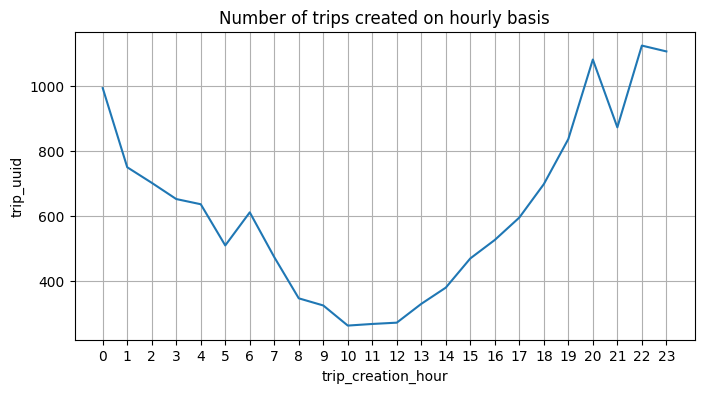

In [45]:
df_hour = df2.groupby(by = 'trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (8, 4))
sns.lineplot(data = df_hour,
             x = df_hour['trip_creation_hour'],
             y = df_hour['trip_uuid'],
             markers = '*')
plt.xticks(np.arange(0,24)) # to get all 24 hours in x-axis
plt.title("Number of trips created on hourly basis")
plt.grid('both')
plt.plot()


From the above plot we can notice that trips gets increased after noon and reaches its peak at 10.00 pm and the start decreasing again

*2)  Trips created on different days of the month*

[]

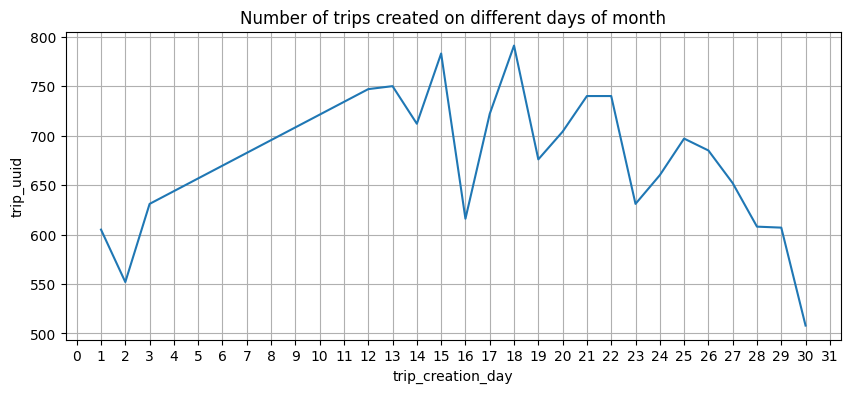

In [46]:
df_day = df2.groupby(by = 'trip_creation_day')['trip_uuid'].count().to_frame().reset_index()
plt.figure(figsize = (10, 4))
sns.lineplot(data = df_day,
             x = df_day['trip_creation_day'],
             y = df_day['trip_uuid'],
             markers = 'o')
plt.xticks(np.arange(0,32)) # to get all 32 daysin x-axis
plt.title("Number of trips created on different days of month")
plt.grid('both')
plt.plot()

It can be inferred from the above plot that most of the trips are created in the mid of the month i.e most of customers places orders in mid of the month and least orders are placed at the end of the month i.e 30th of the month.

*3)  Trips created on different weeks*

[]

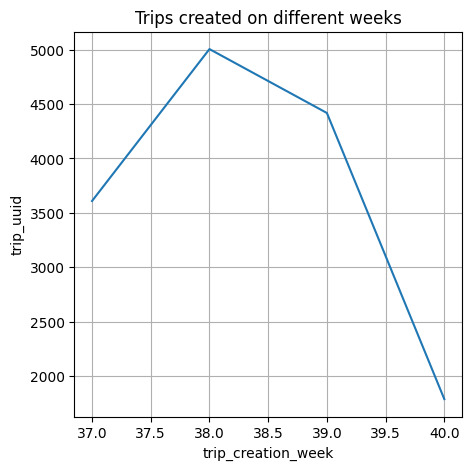

In [47]:
df_week = df2.groupby(by = 'trip_creation_week')['trip_uuid'].count().to_frame().reset_index()
plt.figure(figsize = (5, 5))
sns.lineplot(data = df_week,
             x = df_week['trip_creation_week'],
             y = df_week['trip_uuid'])
plt.title("Trips created on different weeks")
plt.grid('both')
plt.plot()

It can be inferred from the above plot that most of the trips are created in the 38th week.

*4) Number of trips are created in the given two months*

In [48]:
df_month = df2.groupby(by = 'trip_creation_month')['trip_uuid'].count().to_frame().reset_index()
df_month['perc'] = np.round(df_month['trip_uuid'] * 100/ df_month['trip_uuid'].sum(), 2)
df_month.head()

,trip_creation_month,trip_uuid,perc
0,9,13029,87.93
1,10,1788,12.07


[]

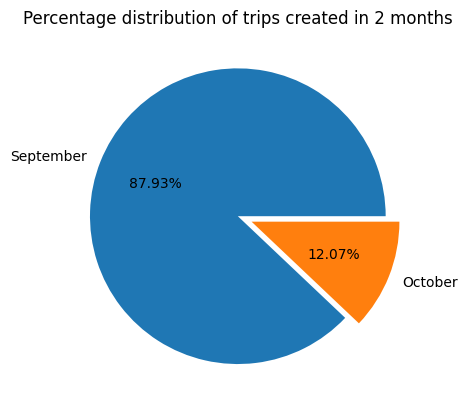

In [49]:
plt.pie(x = df_month['trip_uuid'], labels = ['September', 'October'],
        explode = [0, 0.1], autopct = '%.2f%%')
plt.title("Percentage distribution of trips created in 2 months")
plt.plot()
# autopct : allows us to display the percent value using string formatting
# explode : The exploded slices look as if they were cut out from the pie
# and moved slightly outward from its center

Around 87.93% of trips i.e 13029 trips were created in September and 12% in the month of October

*5) Distribution of trip data for the orders*

In [50]:
df_data = df2.groupby(by = 'data')['trip_uuid'].count().to_frame().reset_index()
df_data['perc'] = np.round(df_data['trip_uuid'] * 100/ df_data['trip_uuid'].sum(), 2)
df_data

,data,trip_uuid,perc
0,test,4163,28.1
1,training,10654,71.9


[]

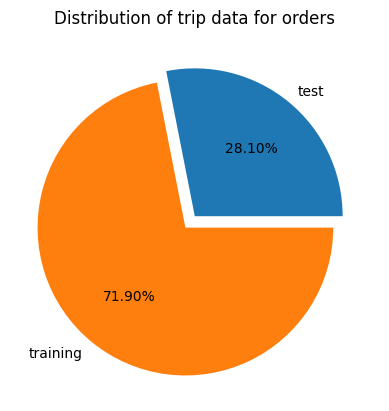

In [51]:
plt.pie(x = df_data['trip_uuid'], labels = df_data['data'],explode = [0, 0.1],
        autopct = '%.2f%%')
plt.title("Distribution of trip data for orders")
plt.plot()

*6) Distribution of route types for the orders*


In [52]:
df_route = df2.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
df_route['perc'] = np.round(df_route['trip_uuid'] * 100/ df_route['trip_uuid'].sum(), 2)
df_route.head()

,route_type,trip_uuid,perc
0,Carting,8908,60.12
1,FTL,5909,39.88


[]

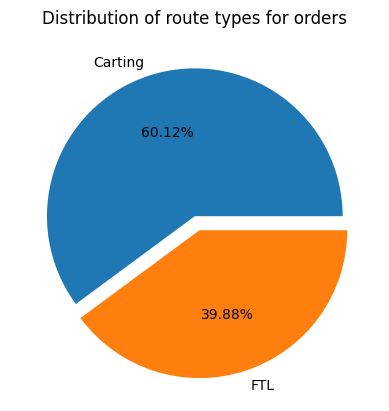

In [53]:
plt.pie(x = df_route['trip_uuid'], labels = ['Carting', 'FTL'],explode = [0, 0.1],
        autopct = '%.2f%%')
plt.title("Distribution of route types for orders")
plt.plot()

*7) Distribution of number of trips created from different states*

[]

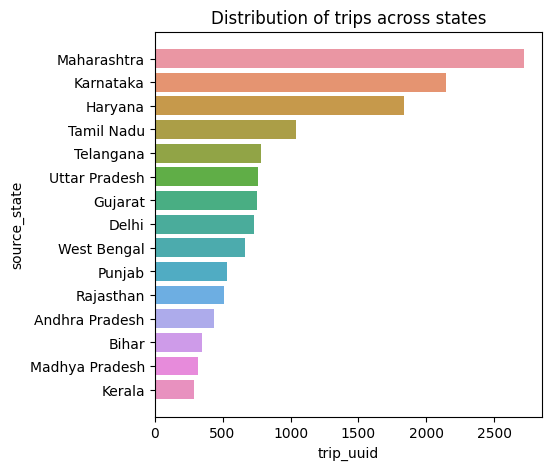

In [54]:
df_source_state = df2.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2) #sorting in descending order
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False)[:15]
plt.figure(figsize = (5, 5))
sns.barplot(data = df_source_state,x = df_source_state['trip_uuid'],
            y = df_source_state['source_state'])
plt.title("Distribution of trips across states")
plt.plot()

From the above plot we can infere that maximum trips originated from Maharashtra state followed by Karnataka and Haryana. That means that the seller base is strong in these states

*8) Top 10 cities based on the number of trips created from different cities*

[]

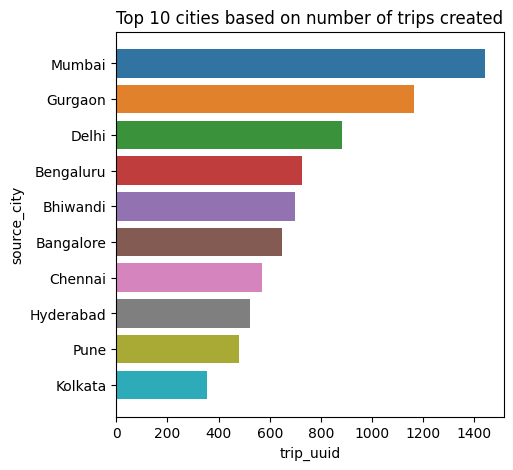

In [55]:
df_source_city = df2.groupby(by = 'source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city['perc'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values(by = 'trip_uuid', ascending = False)[:10]
plt.figure(figsize = (5, 5))
sns.barplot(data = df_source_city,
            x = df_source_city['trip_uuid'],
            y = df_source_city['source_city'])
plt.title("Top 10 cities based on number of trips created")
plt.plot()

Maximum trips originated from Mumbai city followed by Gurgaon Delhi, Bengaluru and Bhiwandi. That means that the seller base is strong in these cities

*9) Distribution of number of trips on basis of their destination states*

In [56]:
df_destination_state = df2.groupby(by = 'destination_state')['trip_uuid'].count().to_frame().reset_index()
df_destination_state['perc'] = np.round(df_destination_state['trip_uuid'] * 100/ df_destination_state['trip_uuid'].sum(), 2)
df_destination_state = df_destination_state.sort_values(by = 'trip_uuid', ascending = False)[:15]
df_destination_state.head()

,destination_state,trip_uuid,perc
18,Maharashtra,2561,17.28
15,Karnataka,2294,15.48
11,Haryana,1643,11.09
25,Tamil Nadu,1084,7.32
28,Uttar Pradesh,811,5.47


[]

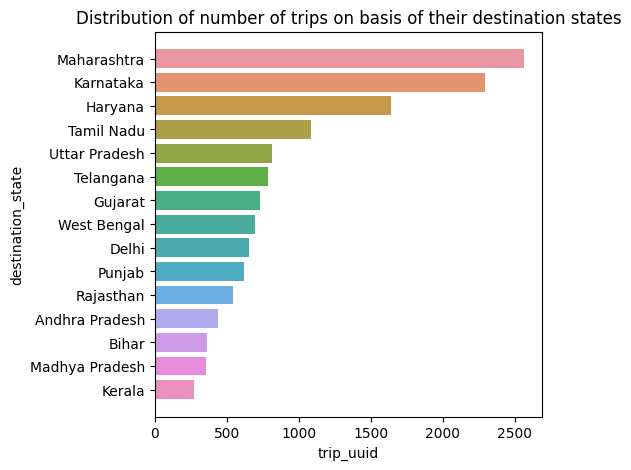

In [57]:
plt.figure(figsize = (5, 5))
sns.barplot(data = df_destination_state,
            x = df_destination_state['trip_uuid'],
            y = df_destination_state['destination_state'])
plt.title("Distribution of number of trips on basis of their destination states")
plt.plot()

It can be seen in the above plot that maximum trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high in these state

10) Top 10 cities based on the number of trips ended in different cities

In [58]:
df_destination_city = df2.groupby(by = 'destination_city')['trip_uuid'].count().to_frame().reset_index()
df_destination_city['perc'] = np.round(df_destination_city['trip_uuid'] * 100/ df_destination_city['trip_uuid'].sum(), 2)
df_destination_city = df_destination_city.sort_values(by = 'trip_uuid', ascending = False)[:10]
df_destination_city

,destination_city,trip_uuid,perc
515,Mumbai,1548,10.45
96,Bengaluru,975,6.58
282,Gurgaon,936,6.32
200,Delhi,778,5.25
163,Chennai,595,4.02
72,Bangalore,551,3.72
308,Hyderabad,503,3.39
115,Bhiwandi,434,2.93
418,Kolkata,384,2.59
158,Chandigarh,339,2.29


[]

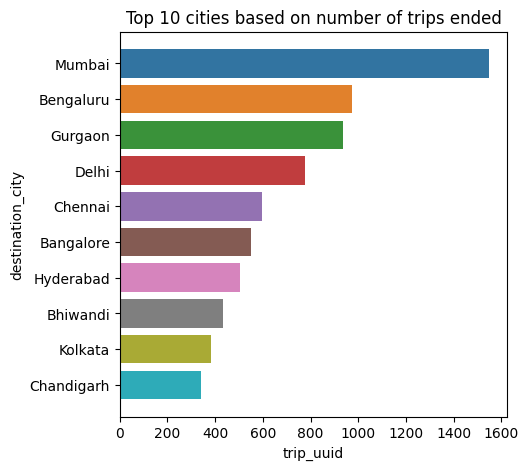

In [59]:
plt.figure(figsize = (5, 5))
sns.barplot(data = df_destination_city, x = df_destination_city['trip_uuid'],
            y = df_destination_city['destination_city'])
plt.title("Top 10 cities based on number of trips ended")
plt.plot()

Maximum  number of trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai. That means that the number of orders placed in these cities is significantly high which are some of major metropolitian cities of India

*11) Understanding the Correlation between numerical columns using a heat map*

In [60]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
df_corr = df2[numerical_columns].corr()
df_corr

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
od_total_time,1.000000,0.999999,0.918222,0.961094,0.926516,0.924219,0.961119,0.918490,0.919199
start_scan_to_end_scan,0.999999,1.000000,0.918308,0.961147,0.926571,0.924299,0.961171,0.918561,0.919291
actual_distance_to_destination,0.918222,0.918308,1.000000,0.953757,0.993561,0.997264,0.952821,0.987538,0.993061
actual_time,0.961094,0.961147,0.953757,1.000000,0.958593,0.959214,0.999989,0.953872,0.956967
osrm_time,0.926516,0.926571,0.993561,0.958593,1.000000,0.997580,0.957765,0.993259,0.991608
osrm_distance,0.924219,0.924299,0.997264,0.959214,0.997580,1.000000,0.958353,0.991798,0.994710
segment_actual_time,0.961119,0.961171,0.952821,0.999989,0.957765,0.958353,1.000000,0.953039,0.956106
segment_osrm_time,0.918490,0.918561,0.987538,0.953872,0.993259,0.991798,0.953039,1.000000,0.996092
segment_osrm_distance,0.919199,0.919291,0.993061,0.956967,0.991608,0.994710,0.956106,0.996092,1.000000


[]

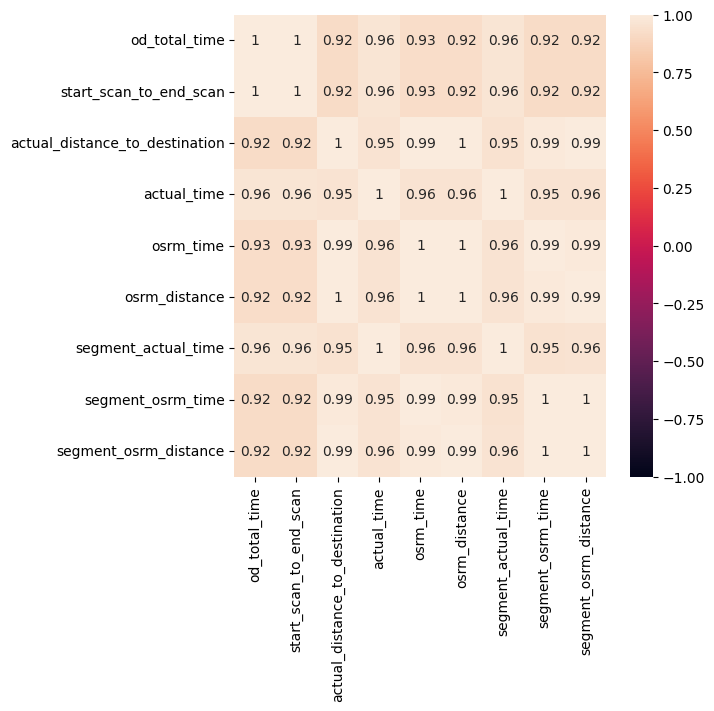

In [61]:
plt.figure(figsize = (6, 6))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.plot()

As we can see the correlation between numerical columns is above 0.9 i.e there exist a very high correlation between all the numerical columns

**3. In-depth analysis and feature engineering**

***3.2) Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.***

*Set up Null Hypothesis and Alternative hypothesis*

H0 : od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same.

HA : od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different.

**Visual Tests to know if the samples follow normal distribution using hist plot**


[]

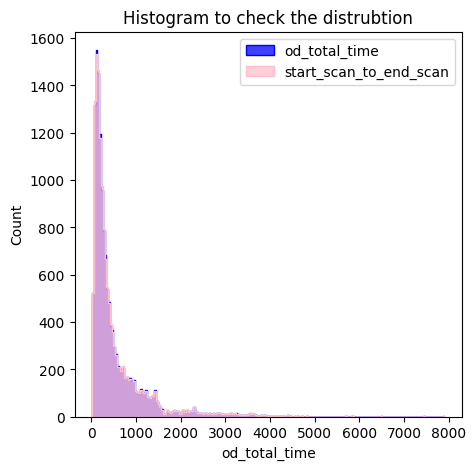

In [62]:
plt.figure(figsize = (5, 5))
sns.histplot(df2['od_total_time'], element = 'step', color = 'blue')
sns.histplot(df2['start_scan_to_end_scan'], element = 'step', color = 'pink')
plt.legend(['od_total_time', 'start_scan_to_end_scan'])
plt.title("Histogram to check the distrubtion")
plt.plot()

**Shapiro-Wilk test for normality:**

 H0 : The sample follows normal distribution

 H1 : The sample does not follow normal distribution

In [88]:
# Test for normality for start_scan_to_end_scan column
test_stat, p_value = spy.shapiro(df2['start_scan_to_end_scan'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [90]:
# Test for normality for od_total_time column
test_stat, p_value = spy.shapiro(df2['od_total_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


Both the sample do not follow normal distribution therefore transforming the data using boxcox transformation to check if the transformed data follows normal distribution

In [91]:
#Box-cox transformation for od_total_time
transformed_od_total_time = spy.boxcox(df2['od_total_time'])[0]
test_stat, p_value = spy.shapiro(transformed_od_total_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.172770042757021e-25
The sample does not follow normal distribution


In [92]:
#Box-cox transformation for start_scan_to_end_scan
transformed_start_scan_to_end_scan = spy.boxcox(df2['start_scan_to_end_scan'])[0]
test_stat, p_value = spy.shapiro(transformed_start_scan_to_end_scan)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0471322892609475e-24
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "od_total_time" and "start_scan_to_end_scan" columns, the distributions do not follow normal distribution.

**Homogeneity of Variances using Lavene's test**

H0 - Same Variance

H1 - Non Homogenous Variance

In [93]:
test_stat, p_value = spy.levene(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.9668007217581142
The samples have Homogenous Variance 


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [94]:
test_stat, p_value = spy.mannwhitneyu(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('P-value :',p_value)

P-value : 0.7815123224221716


**Conclusion** : As we can see p_value > 0.05 we can accept the null hypothesis that od_total_time and start_scan_to_end_scan are similar.

***3.3 Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)***

**Set up Null Hypothesis and Alternative hypothesis**

H0 : actual_time and orsm_time  are same.

HA : actual_time and orsm_time are different.

**Visual Analysis of distribution using QQ Plot**

[]

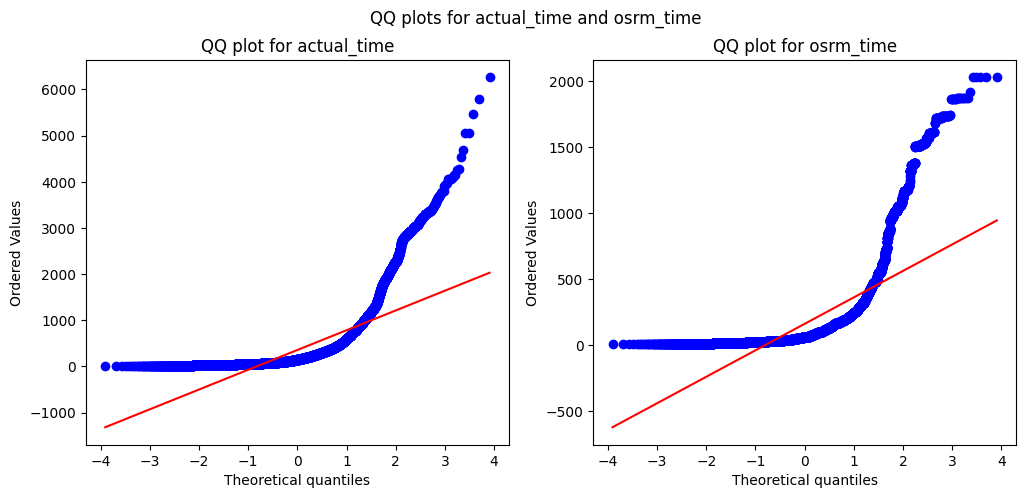

In [98]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
spy.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

As we can infer distribution does not follow normal distribution

**Shapiro-Wilk test for normality with alpha 0.05:**

 H0 : The sample follows normal distribution

 H1 : The sample does not follow normal distribution

In [99]:
# Test for normality for actual_time column
test_stat, p_value = spy.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [100]:
# Test for normality for orsm_time column
test_stat, p_value = spy.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


Both the sample do not follow normal distribution therefore transforming the data using boxcox transformation to check if the transformed data follows normal distribution

In [101]:
#Box-cox transformation for actual_time
transformed_actual_time = spy.boxcox(df2['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.020620453603145e-28
The sample does not follow normal distribution


In [102]:
#Box-cox transformation for orsm_time
transformed_osrm_time = spy.boxcox(df2['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.5882550510138333e-35
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "actual_time" and "orsm_time" columns, the distributions do not follow normal distribution.

**Homogeneity of Variances using Lavene's test**

H0 - Same Variance

H1 - Non Homogenous Variance

In [105]:
test_stat, p_value = spy.levene(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.871098057987424e-220
The samples do not have  Homogenous Variance


Since the samples are not normally distributed, and donot follow any assumptions of T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples

In [106]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.0
The samples are not similar


**Conclusion** : As we can see p_value > 0.05 we can accept the null hypothesis that actual_time and osrm_time are not similar

**3.4 Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you will get after merging the rows on the basis of trip_uuid)**

**Set up Null Hypothesis and Alternative hypothesis**

H0 : actual_time and segment_actual_time are same.

HA : actual_time and segment_actual_time are different.

**Visual Analysis of distribution using QQ Plot**

[]

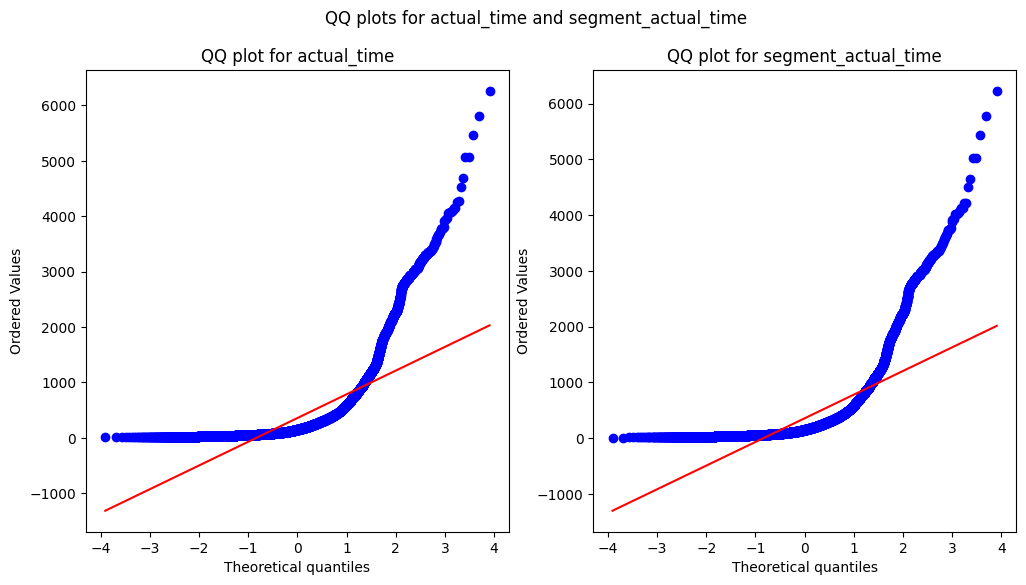

In [108]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
spy.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

As we can infer distribution does not follow normal distribution

**Shapiro-Wilk test for normality with alpha 0.05:**

 H0 : The sample follows normal distribution

 H1 : The sample does not follow normal distribution

In [109]:
# Test for normality for  column actual_time
test_stat, p_value = spy.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [110]:
# Test for normality for  column segment_actual_time
test_stat, p_value = spy.shapiro(df2['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


Both the sample do not follow normal distribution therefore transforming the data using boxcox transformation to check if the transformed data follows normal distribution

In [111]:
#Box-cox transformation for actual_time
transformed_actual_time = spy.boxcox(df2['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.020620453603145e-28
The sample does not follow normal distribution


In [112]:
#Box-cox transformation for segment_actual_time
transformed_segment_actual_time = spy.boxcox(df2['segment_actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.700074948787037e-29
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "actual_time" and "segment_actual_time" columns, the distributions do not follow normal distribution.

**Homogeneity of Variances using Lavene's test**

H0 - Same Variance

H1 - Non Homogenous Variance

In [113]:
test_stat, p_value = spy.levene(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.695502241317651
The samples have Homogenous Variance 


As the samples do not come from normal distribution T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples

In [114]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.4164235159622476
The samples are similar 


**Conclusion** : As p_value > 0.05 we can conclude that actual_time and segment_actual_time are similar

**3.5 Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you will get after merging the rows on the basis of trip_uuid)**

**Set up Null Hypothesis and Alternative hypothesis**

H0 : orsm_distance and segment_orsm_distance are same.

HA : orsm_distance and segment_orsm_distance are different

**Visual Analysis of distribution using QQ Plot**

[]

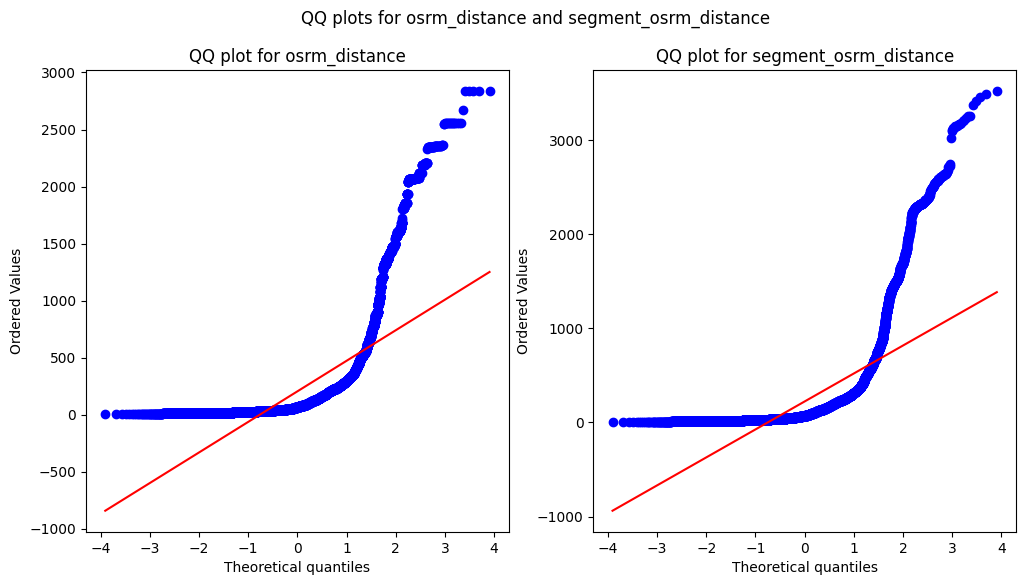

In [116]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
spy.probplot(df2['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()

As we can infer distribution does not follow normal distribution

**Shapiro-Wilk test for normality with alpha 0.05:**

 H0 : The sample follows normal distribution

 H1 : The sample does not follow normal distribution

In [117]:
# Test for normality for osrm_distance column
test_stat, p_value = spy.shapiro(df2['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [118]:
# Test for normality for segment_osrm_distance column
test_stat, p_value = spy.shapiro(df2['segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


Both the sample do not follow normal distribution therefore transforming the data using boxcox transformation to check if the transformed data follows normal distribution

In [119]:
# Box-cox  transormation for orsm_distance
transformed_osrm_distance = spy.boxcox(df2['osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.063104779582808e-41
The sample does not follow normal distribution


In [120]:
# Box-cox  transormation for segment_orsm_distance
transformed_segment_osrm_distance = spy.boxcox(df2['segment_osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.049169406432229e-38
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "segment_orsm_distance" and "orsm_distance" columns, the distributions do not follow normal distribution.

**Homogeneity of Variances using Lavene's test**

H0 - Same Variance

H1 - Non Homogenous Variance

In [121]:
test_stat, p_value = spy.levene(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.00020976006524780905
The samples do not have Homogenous Variance


As the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples

In [122]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 9.509410818847664e-07
The samples are not similar


**Conclusion** :  As p_value < 0.05 we can conclude that that osrm_distance and segment_osrm_distance are not similar

**3.6 Do hypothesis testing/ visual analysis between osrm_time aggregated value and segment osrm time aggregated value (aggregated values are the values you will get after merging the rows on the basis of trip_uuid))**

**Set up Null Hypothesis and Alternative hypothesis**

H0 : segment_orsm_time and orsm_time are same.

HA : segment_orsm_time and orsm_time are different

**Visual Analysis of distribution using QQ Plot**

[]

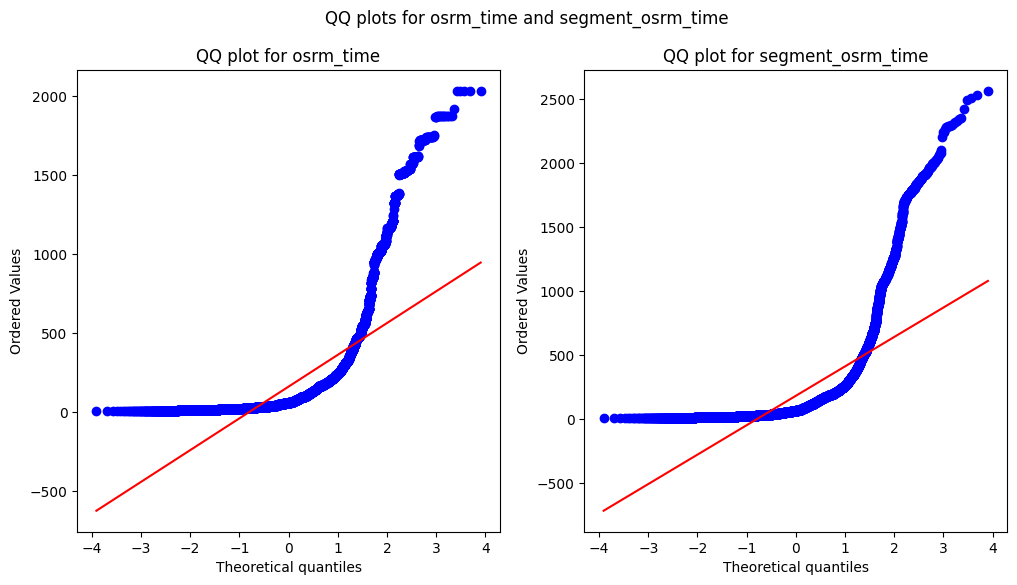

In [124]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
spy.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

As we can infer distribution does not follow normal distribution

**Shapiro-Wilk test for normality with alpha 0.05:**

 H0 : The sample follows normal distribution

 H1 : The sample does not follow normal distribution

In [126]:
# Test for normality for orsm_time column
test_stat, p_value = spy.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [127]:
# Test for normality for segment_osrm_time column
test_stat, p_value = spy.shapiro(df2['segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


Both the sample do not follow normal distribution therefore transforming the data using boxcox transformation to check if the transformed data follows normal distribution

In [129]:
# Box-cox transformation of orsm_time
transformed_osrm_time = spy.boxcox(df2['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.5882550510138333e-35
The sample does not follow normal distribution


In [130]:
# Box-cox transformation of segment_orsm_time
transformed_segment_osrm_time = spy.boxcox(df2['segment_osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.943039152219146e-34
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "orsm_time" and "segment_orsm_time" columns, the distributions do not follow normal distribution.

**Homogeneity of Variances using Lavene's test**

H0 - Same Variance

H1 - Non Homogenous Variance

In [131]:
test_stat, p_value = spy.levene(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 8.349506135727595e-08
The samples do not have Homogenous Variance


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [132]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 2.2995370859748865e-08
The samples are not similar


**Conclusion** : As p-value < 0.05 therfore it can be concluded that osrm_time and segment_osrm_time are not similar.

**3.7 Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis**


In [63]:
df2[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14817.0,531.697630,658.868223,23.460000,149.930000,280.770000,638.200000,7898.550000
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.000000,149.000000,280.000000,637.000000,7898.000000
actual_distance_to_destination,14817.0,164.477829,305.388153,9.002461,22.837238,48.474072,164.583206,2186.531738
actual_time,14817.0,357.143768,561.396118,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14817.0,161.384018,271.360992,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14817.0,204.344711,370.395569,9.072900,30.819201,65.618805,208.475006,2840.081055
segment_actual_time,14817.0,353.892273,556.247925,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_time,14817.0,180.949783,314.542053,6.000000,31.000000,65.000000,185.000000,2564.000000
segment_osrm_distance,14817.0,223.201157,416.628387,9.072900,32.654499,70.154404,218.802399,3523.632324


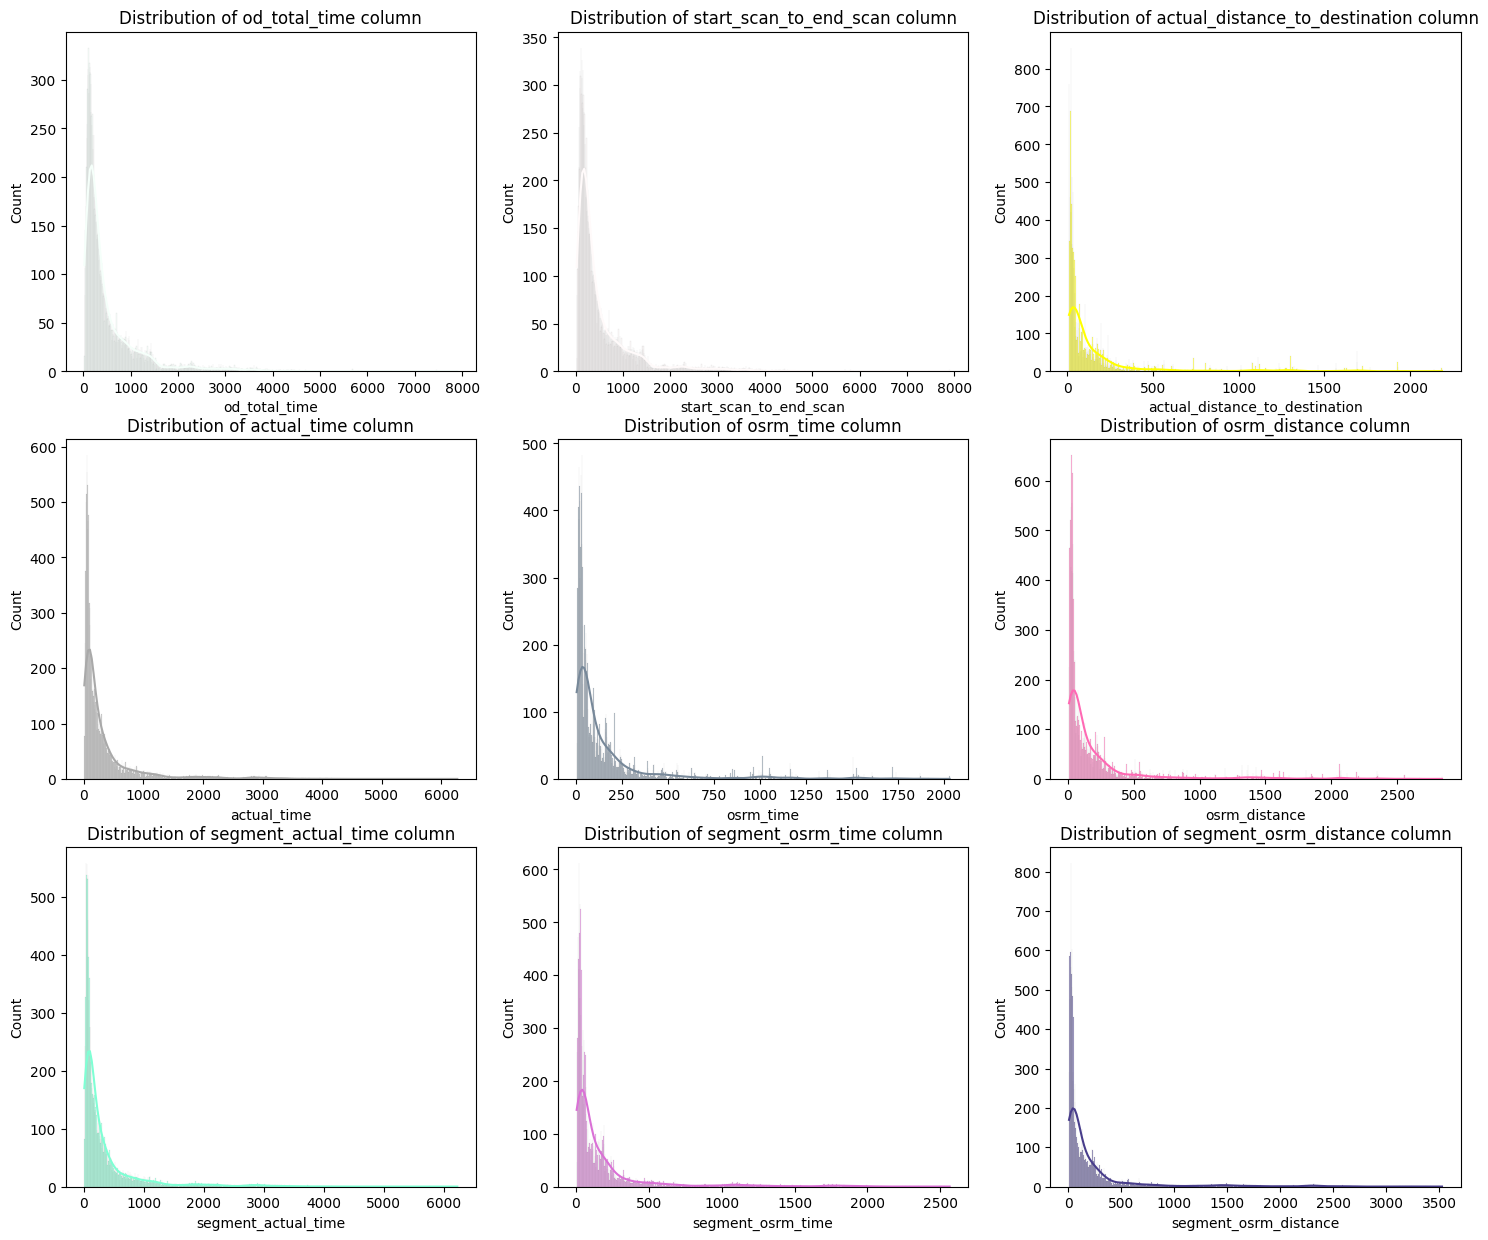

In [64]:
#hist plot to understand the distribution of numerical columns
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.histplot(df2[numerical_columns[i]], bins = 1000, kde = True, color = clr)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

We can infer from the above plots that data in all the numerical columns are rightly skewed.

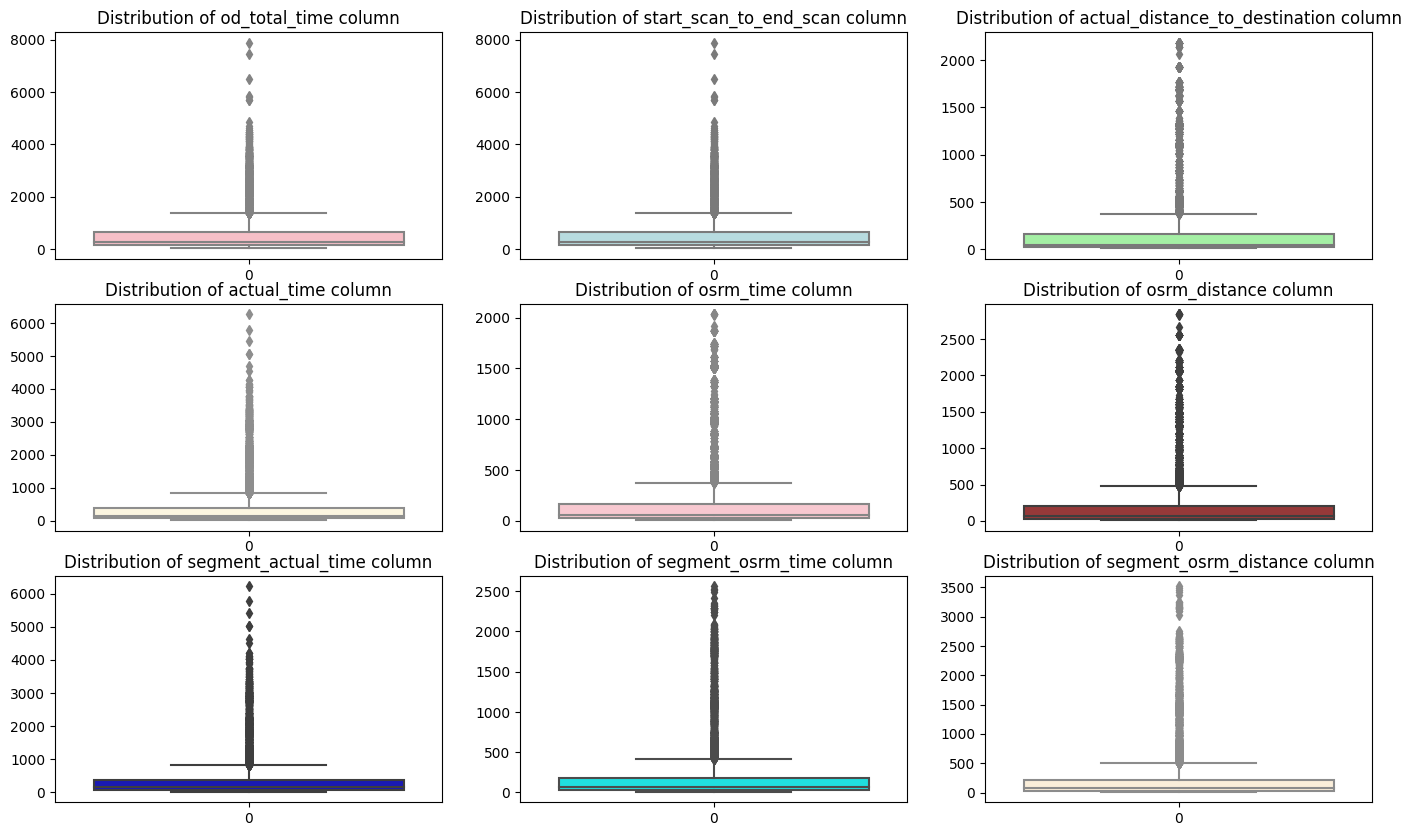

In [65]:
# Using box plot to check the outliers
plt.figure(figsize = (17, 10))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.boxplot(df2[numerical_columns[i]], color = clr)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

We can clearly see that there are outliers in all the numerical columns

***3.8 Handle the outliers using the IQR method***

In [66]:
for i in numerical_columns:
  Q1 =np.quantile(df2[i],.25)
  Q3 =np.quantile(df2[i],.75)
  IQR = Q3 - Q1
  LB = Q1 - 1.5* IQR
  UB = Q3 + 1.5* IQR
  outliers = df2.loc[(df2[i] < LB) | (df2[i] > UB) ]
  print('Column :', i,end = "\n")
  print(f'Q1 : {Q1}')
  print(f'Q3 : {Q3}')
  print(f'IQR : {IQR}')
  print(f'LB : {LB}')
  print(f'UB : {UB}')
  print(f'Number of outliers : {outliers.shape[0]}')
  print('----------------------------------')


Column : od_total_time
Q1 : 149.93
Q3 : 638.2
IQR : 488.27000000000004
LB : -582.4750000000001
UB : 1370.605
Number of outliers : 1266
----------------------------------
Column : start_scan_to_end_scan
Q1 : 149.0
Q3 : 637.0
IQR : 488.0
LB : -583.0
UB : 1369.0
Number of outliers : 1267
----------------------------------
Column : actual_distance_to_destination
Q1 : 22.837238311767578
Q3 : 164.5832061767578
IQR : 141.74596786499023
LB : -189.78171348571777
UB : 377.20215797424316
Number of outliers : 1449
----------------------------------
Column : actual_time
Q1 : 67.0
Q3 : 370.0
IQR : 303.0
LB : -387.5
UB : 824.5
Number of outliers : 1643
----------------------------------
Column : osrm_time
Q1 : 29.0
Q3 : 168.0
IQR : 139.0
LB : -179.5
UB : 376.5
Number of outliers : 1517
----------------------------------
Column : osrm_distance
Q1 : 30.81920051574707
Q3 : 208.47500610351562
IQR : 177.65580558776855
LB : -235.66450786590576
UB : 474.95871448516846
Number of outliers : 1524
-------------

The outliers present in our sample data can be the true outliers. It's best to remove outliers only when there is a sound reason for doing so. Some outliers represent natural variations in the population, and they should be left as is in the dataset

***3.9 ) Do one-hot encoding of categorical variables (route_type)***

In [67]:
# Get value counts before one-hot encoding
df2['route_type'].value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [68]:
# Perform one-hot encoding on categorical column route type
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['route_type'] = label_encoder.fit_transform(df2['route_type'])

df2['route_type'].value_counts()

0    8908
1    5909
Name: route_type, dtype: int64

*-- One-hot encoding for data column --*

In [69]:
# Get value counts before one-hot encoding
df2['data'].value_counts()

training    10654
test         4163
Name: data, dtype: int64

In [70]:
# Perform one-hot encoding on categorical column data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['data'] = label_encoder.fit_transform(df2['data'])

df2['data'].value_counts()

1    10654
0     4163
Name: data, dtype: int64

**3.10 Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.**

In [71]:
from sklearn.preprocessing import MinMaxScaler

[]

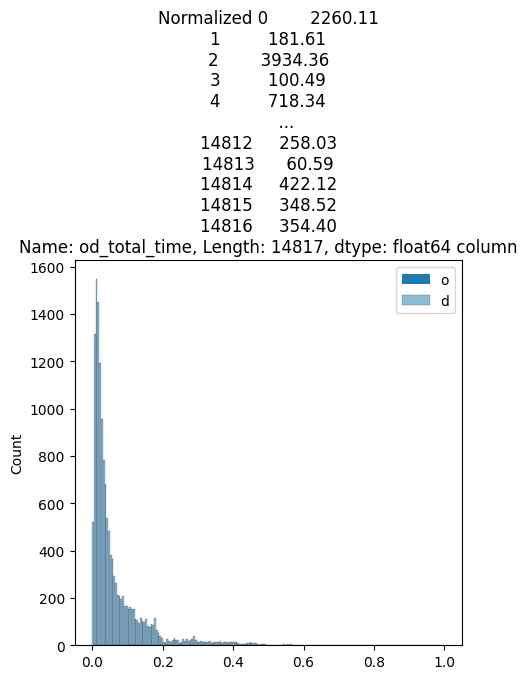

In [72]:
#Normalizing od_total_time
plt.figure(figsize = (5, 5))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

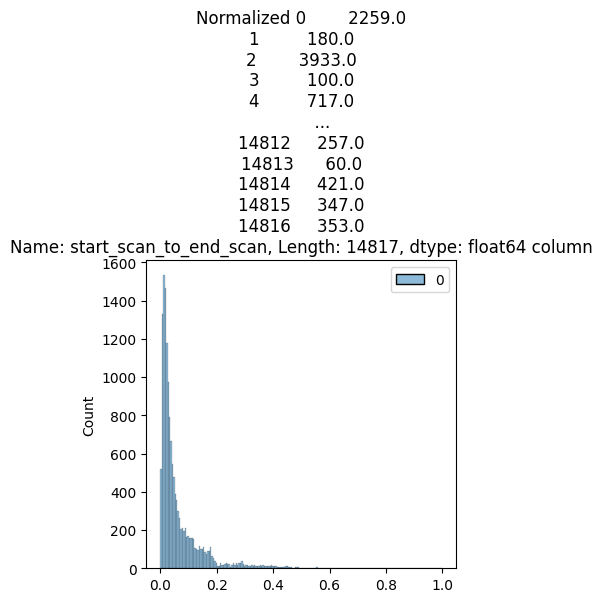

In [73]:
#Normalize the start_scan_to_end_scan column
plt.figure(figsize = (4,4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['start_scan_to_end_scan']} column")
plt.plot()

[]

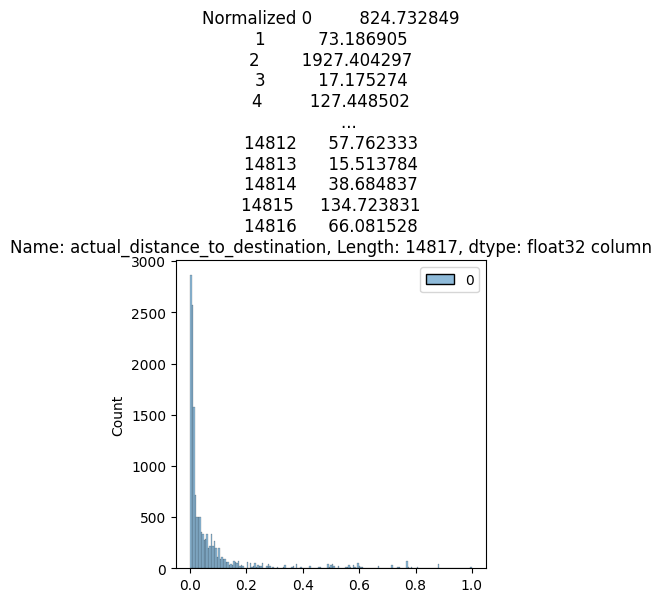

In [74]:
#Normalize the actual_distance_to_destination column
plt.figure(figsize = (4, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['actual_distance_to_destination']} column")
plt.plot()

[]

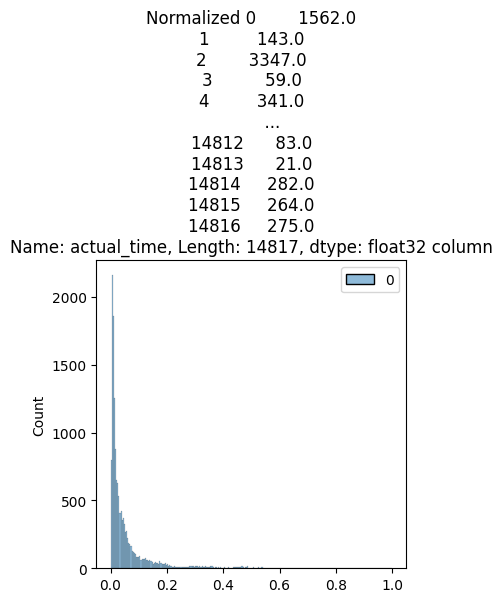

In [75]:
#Normalize the actual_time column
plt.figure(figsize = (4, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['actual_time']} column")
plt.plot()

[]

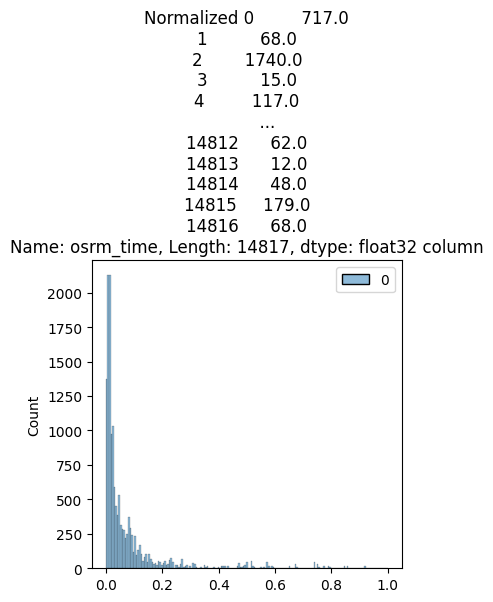

In [76]:
#Normalize the orsm_time column
plt.figure(figsize = (4, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['osrm_time']} column")
plt.plot()

[]

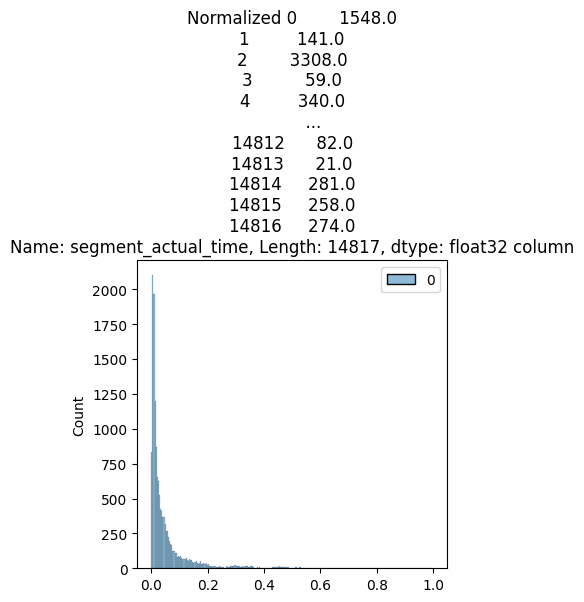

In [77]:
#Normalize the segment_actual_time column
plt.figure(figsize = (4, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_actual_time']} column")
plt.plot()

[]

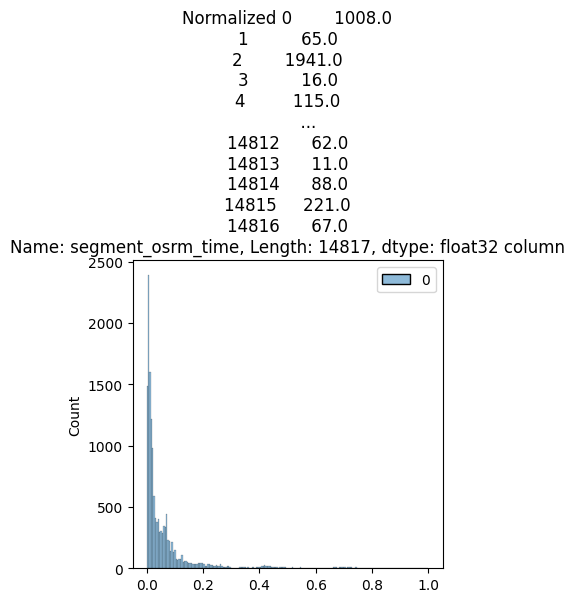

In [78]:
#Normalize the segment_actual_time column
plt.figure(figsize = (4, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_osrm_time']} column")
plt.plot()

***Column Standardization***

In [79]:
from sklearn.preprocessing import StandardScaler

[]

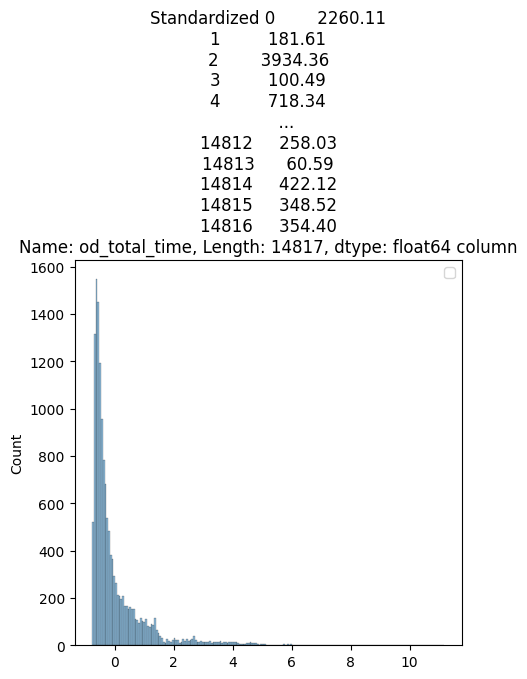

In [80]:
# Standardizing the od_total_time column
plt.figure(figsize = (5, 5))
scaler = StandardScaler() # define standard scaler
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1)) # transform data
sns.histplot(scaled)
plt.title(f"Standardized {df2['od_total_time']} column")
plt.legend('')
plt.plot()

[]

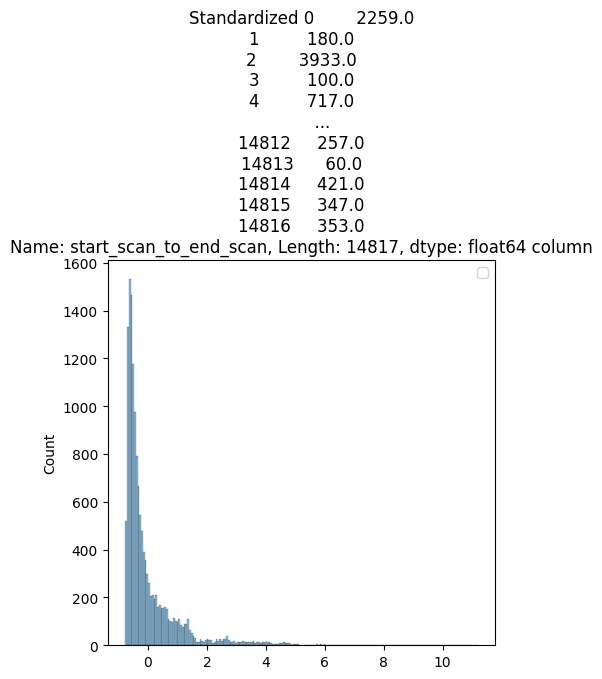

In [81]:
# Standardizing the start_scan_to_end_scan column
plt.figure(figsize = (5, 5))
scaler = StandardScaler() # define standard scaler
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1)) # transform data
sns.histplot(scaled)
plt.title(f"Standardized {df2['start_scan_to_end_scan']} column")
plt.legend('')
plt.plot()

[]

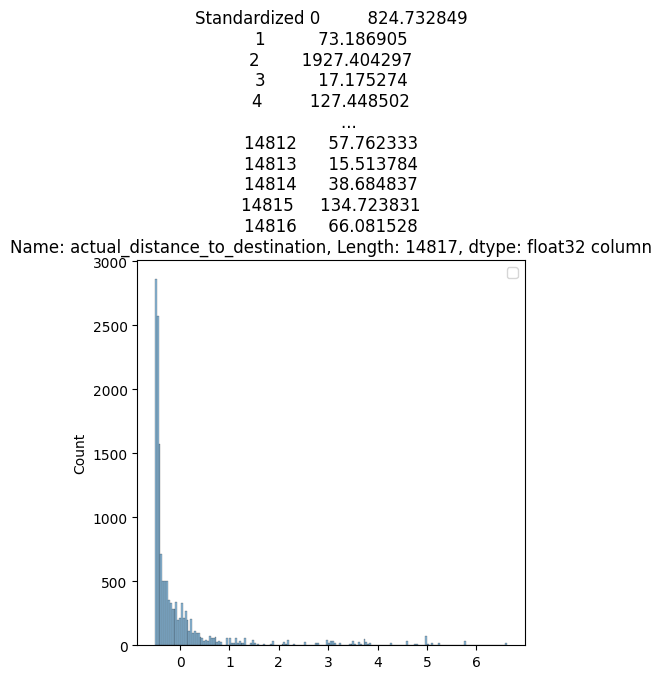

In [82]:
# Standardizing the actual_distance_to_destination column
plt.figure(figsize = (5, 5))
scaler = StandardScaler() # define standard scaler
scaled = scaler.fit_transform(df2['actual_distance_to_destination'].to_numpy().reshape(-1, 1)) # transform data
sns.histplot(scaled)
plt.title(f"Standardized {df2['actual_distance_to_destination']} column")
plt.legend('')
plt.plot()

[]

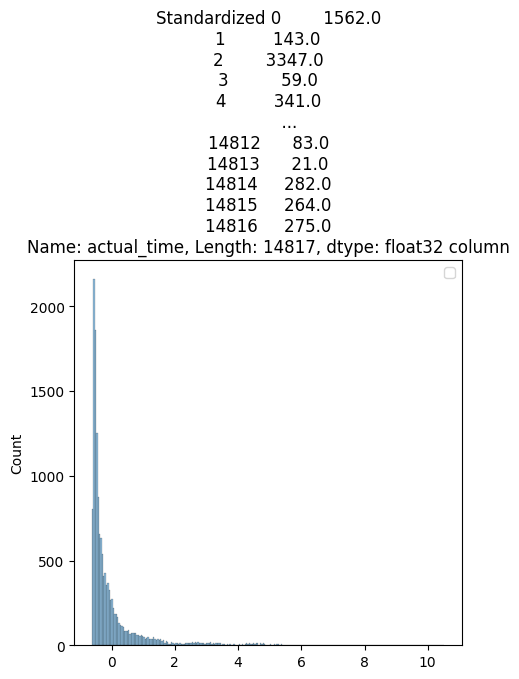

In [83]:
# Standardizing the actual_time column
plt.figure(figsize = (5, 5))
scaler = StandardScaler() # define standard scaler
scaled = scaler.fit_transform(df2['actual_time'].to_numpy().reshape(-1, 1)) # transform data
sns.histplot(scaled)
plt.title(f"Standardized {df2['actual_time']} column")
plt.legend('')
plt.plot()

[]

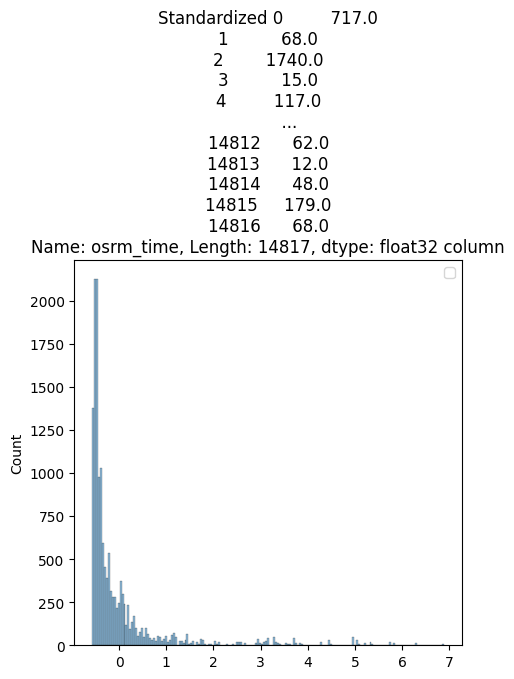

In [84]:
# Standardizing the osrm_time column
plt.figure(figsize = (5, 5))
scaler = StandardScaler() # define standard scaler
scaled = scaler.fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1)) # transform data
sns.histplot(scaled)
plt.title(f"Standardized {df2['osrm_time']} column")
plt.legend('')
plt.plot()

[]

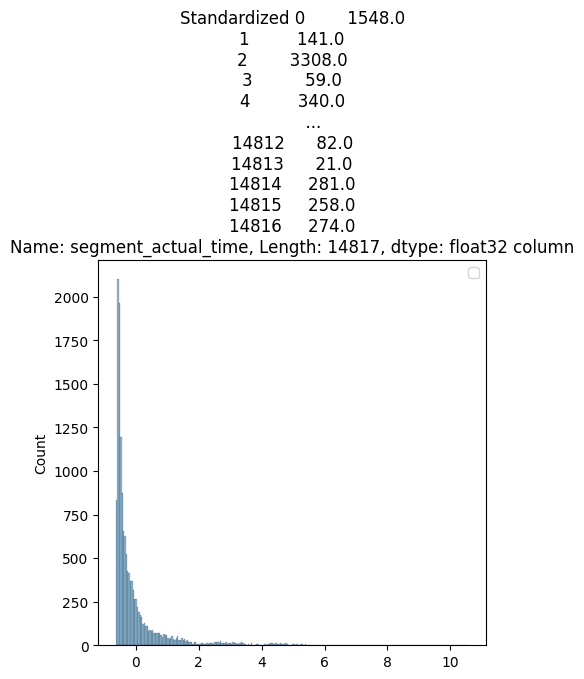

In [85]:
# Standardizing the segment_actual_time column
plt.figure(figsize = (5, 5))
scaler = StandardScaler() # define standard scaler
scaled = scaler.fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1)) # transform data
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_actual_time']} column")
plt.legend('')
plt.plot()

[]

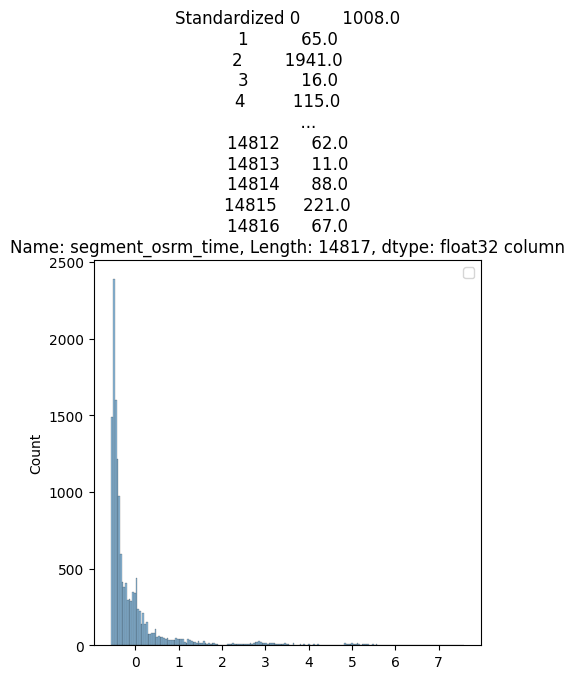

In [86]:
# Standardizing the segment_osrm_time column
plt.figure(figsize = (5, 5))
scaler = StandardScaler() # define standard scaler
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1)) # transform data
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_osrm_time']} column")
plt.legend('')
plt.plot()

[]

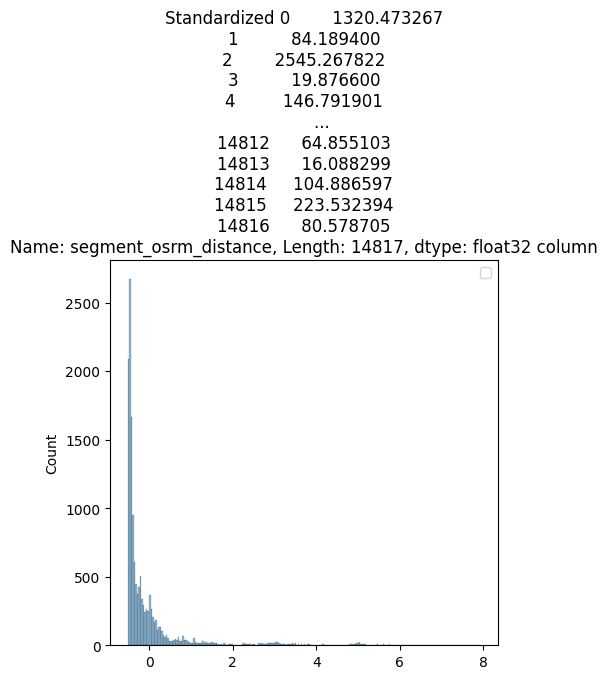

In [87]:
# Standardizing the segment_osrm_distance column
plt.figure(figsize = (5, 5))
scaler = StandardScaler() # define standard scaler
scaled = scaler.fit_transform(df2['segment_osrm_distance'].to_numpy().reshape(-1, 1)) # transform data
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_osrm_distance']} column")
plt.legend('')
plt.plot()

**9. Business Insights**
1. The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.
2. There are about 14817 unique trip IDs, 1508 unique source centers, 1481 unique destination_centers, 690 unique source cities, 806 unique destination cities.
3.Most common route type is Carting.
4. The names of 14 unique location ids are missing in the data.
5. Most of the data is for testing than for training.
6. Maximum trips are created in the 38th week.
7. The number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.
8. Most orders come mid-month. That means customers usually make more orders in the mid of the month.
9.Most orders are sourced from the states like Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana.
10.Maximum number of trips originated from Mumbai city followed by Gurgaon Delhi, Bengaluru and Bhiwandi. That means that the seller base is strong in these cities.
11. Maximum number of trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai. That means that the number of orders placed in these cities is significantly high.
12. Maximum number of trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high.
13. Most orders in terms of destination are coming from cities like bengaluru, mumbai, gurgaon, bangalore, Delhi.
14. Features start_scan_to_end_scan and od_total_time(created feature) are statistically similar.
15. Features actual_time & osrm_time are statitically different.
16. Features osrm_distance and segment_osrm_distance are statistically different from each other.
17. Features start_scan_to_end_scan and segment_actual_time are statistically similar.
18. Both the osrm_time & segment_osrm_time are not statistically same

**10. Recommendations**

1. Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these atates and to improve customers' buying and delivery experience
2. Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.
3. From state point of view, we might have very heavy traffic in certain states and bad terrain conditions in certain states. This will be a good indicator to plan and cater to demand during peak festival seasons.
4. osrm_time and actual_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.
5. North, South and West Zones comidors have significant traffic of orders. But, we have a smaller presence in Central, Eastern and North-Eastern zone. However it would be difficult to conclude this, by looking at just 2 months data. It is worth investigating and increasing our presence in these regions.
6. Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum result
7. The OSRM trip planning system needs to be improved
8. osrm_time and actual_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time